In [3]:
# import json
import nltk

import pandas as pd # provide sql-like data manipulation tools. very handy.
pd.options.mode.chained_assignment = None
import numpy as np # high dimensional vector computing library.
from copy import deepcopy
from string import punctuation
from random import shuffle

import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class
LabeledSentence = gensim.models.doc2vec.LabeledSentence # we'll talk about this down below

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import sent_tokenize, word_tokenize 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import re  
import nltk
import pandas as pd
import gensim 
from gensim.models import Word2Vec 
warnings.filterwarnings(action = 'ignore') 

import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import xgboost as xgb

# Data Preparation
import re, string, unicodedata
import nltk
import string
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


import string
import re

from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
from nltk.tokenize import TweetTokenizer

import json
import nltk
import nltk.cluster

from sklearn.metrics import pairwise_distances


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srpayd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Sendiment Analysis Steps

**The goals of the project were:**

- Preprocess/clean the text data, using NLTK
- Use word2vec to create word and title embeddings, then visualize them as clusters using t-SNE
- Visualize the relationship between title sentiment and article popularity
- Attempt to predict article popularity from the embeddings and other available features
- Use model stacking to improve the performance of the popularity model (this step was not successful, but was still a valuable experiment!)

## Load data


In [6]:
# Load data

import json

outputfile=open("user_timeline_realDonaldTrump.jsonl", encoding="utf") 

tweets=[]
for line in outputfile:
    tweets.append(json.loads(line))   #her bir satır json oluyor, bir tweet yani
    

print (len(tweets)) # Output: 5000

3199


In [7]:
# get only tweet texts
messages = [BeautifulSoup(tweet['text']).get_text() for tweet in tweets]

print (len(messages)) # Output: 5000

In [8]:
# see first 5 tweet texts
for t in messages[:5]:
    print(t)

PRESIDENTIAL HARASSMENT!
The Democrats are getting ZERO work done in Congress. All they are focused on is trying to prove the Mueller Report wrong, the Witch Hunt!
After two years of an expensive and comprehensive Witch Hunt, the Democrats don’t like the result and they want a D… https://t.co/70HPBfKve0
Everything the Democrats are asking me for is based on an illegally started investigation that failed for them, esp… https://t.co/9lttyCPIYg
Congratulations to Governor @MattBevin on winning the Republican Primary for Governor tonight in the Great State of… https://t.co/d2BLcqEwZY


## Data preparation
We apply the following transformation to the input text data:

* Clean strings  (html, lowercase,ascii)
* Data Preparation 
* Tokenize — Encode the words <br/>

In [9]:
import re, string, unicodedata
import nltk
import string
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [10]:
# tweets[0]["text"]

In [11]:
# # Bazı content ler bos olabilir onları ayıklıyoruz.
# activities = [post['text'].lower().split() for post in tweets if post['text'] != ""]

In [12]:
# activities[0]

In [13]:
# # Grab all the tweet ids 
# ids = [post['id'] for post in tweets if post['id'] != ""]

In [14]:
# # Grab all the tweet ids 
# ids[1]

In [15]:
# # Collapse the list of strings into a single long string for processing
# big_id_string = ' '.join(str(ids))
# # big_tweet_string=' '.join(activities)


# print(big_id_string)
# print(activities[20])

In [16]:
# import string
# import re
 
# from nltk.corpus import stopwords 
# stopwords_english = stopwords.words('english')
 
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
 
# from nltk.tokenize import TweetTokenizer

 
# # Happy Emoticons
# emoticons_happy = set([
#     ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
#     ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
#     '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
#     'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
#     '<3'
#     ])
 
# # Sad Emoticons
# emoticons_sad = set([
#     ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
#     ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
#     ':c', ':{', '>:\\', ';('
#     ])
# # all emoticons (happy + sad)
# emoticons = emoticons_happy.union(emoticons_sad)


# def clean_tweets(tweet):
#     # remove stock market tickers like $GE
#     tweet = re.sub(r'\$\w*', '', tweet)
 
#     # remove old style retweet text "RT"
#     tweet = re.sub(r'^RT[\s]+', '', tweet)
 
#     # remove hyperlinks
#     tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
#     # remove hashtags
#     # only removing the hash # sign from the word
#     tweet = re.sub(r'#', '', tweet)
    
# #     # removing punctuation
# #     tweet = re.sub(r'''!()-[]{};:'"\,<>./?@#$%^&*_~''', '', tweet)
 
#     # tokenize tweets
#     tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
#     tweet_tokens = tokenizer.tokenize(tweet)
 
#     tweets_clean = []    
#     for word in tweet_tokens:
#         if (word not in stopwords_english and # remove stopwords
#               word not in emoticons and # remove emoticons
#                 word not in string.punctuation): # remove punctuation
#             #tweets_clean.append(word)
#             stem_word = stemmer.stem(word) # stemming word
#             tweets_clean.append(stem_word)
 
#     return tweets_clean

In [17]:
# for i in activities:
#     big_tweet_string=i+" "
tweet_list = [title for title in messages]
print(tweet_list)

In [74]:
# Collapse the list of strings into a single long string for processing
big_tweet_string = ' '.join(tweet_list)

# remove stock market tickers like $GE
big_tweet_string = re.sub(r'\$\w*', '', big_tweet_string)
 
# remove old style retweet text "RT"
big_tweet_string = re.sub(r'^RT[\s]+', '', big_tweet_string)
 
# remove hyperlinks
big_tweet_string = re.sub(r'https?:\/\/.*[\r\n]*', '', big_tweet_string)
    
# remove hashtags
# only removing the hash # sign from the word
big_tweet_string = re.sub(r'#', '', big_tweet_string)

In [75]:
from nltk.tokenize import word_tokenize

# Tokenize the string into words
tokens = word_tokenize(big_tweet_string)

In [76]:
# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

In [77]:
# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [78]:
words = [word for word in words if not word in stop_words]

In [83]:
# Print first 10 words
words[:10]

['presidential',
 'harassment',
 'democrats',
 'getting',
 'zero',
 'work',
 'done',
 'congress',
 'focused',
 'trying']

Next, we need to load in the pre-trained word2vec model. You can find several such models here. Since this is a news dataset, I used the Google News model, which was trained on about 100 billion words.

In [85]:
# Load word2vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

# Check dimension of word vectors
model.vector_size

So the model will generate 300-dimensional word vectors, and all we have to do to create a vector is to pass it through the model. Each vector looks like this:

In [92]:
economy_vec = model['economy']
economy_vec[:20] # First 20 components

array([ 0.18847656, -0.0703125 , -0.16113281,  0.03857422, -0.04956055,
       -0.23046875, -0.15722656, -0.16992188,  0.17089844, -0.01208496,
       -0.16015625, -0.02770996,  0.05932617,  0.00491333, -0.13769531,
        0.39257812,  0.06201172,  0.30859375,  0.12890625, -0.07373047],
      dtype=float32)

word2vec (understandably) can’t create a vector from a word that’s not in its vocabulary. Because of this, we need to specify “if word in model.vocab” when creating the full list of word vectors.

In [96]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
presidential,-0.120117,0.182617,-0.004425,0.193359,0.084473,-0.357422,0.044678,-0.106934,0.120117,-0.136719,...,-0.287109,-0.482422,-0.008362,-0.275391,0.232422,-0.055176,-0.095215,-0.031250,-0.104980,0.273438
harassment,-0.130859,-0.069336,-0.187500,-0.339844,-0.182617,-0.052490,-0.073242,0.140625,0.211914,0.115234,...,0.148438,0.085449,-0.054932,0.039062,0.033936,0.263672,0.018066,0.103027,0.089355,-0.056152
democrats,0.228516,-0.183594,0.118652,0.542969,-0.261719,-0.099121,-0.353516,0.125000,-0.079102,0.035156,...,-0.245117,-0.170898,-0.107910,0.068848,-0.028442,-0.056396,-0.097168,0.085449,0.028687,0.245117


### Dimensionality Reduction with t-SNE

Next, we’re going to squish (read: do dimensionality reduction on) these word vectors using t-SNE, to see if any patterns emerge.

It’s important to play around with the parameters for t-SNE, as different values can produce very different results. I tested several values between 0 and 100 for perplexity, and found that it produced roughly the same shape each time. I tested several learning rates between 20 and 400 as well, and decided to leave the learning rate at its default (200).

For the sake of visibility (and processing time), I used 400 word vectors instead of the full set of 20,000 or so.

#### the most important thing is to iterate until reaching a stable configuration.

In [190]:
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
presidential,-0.120117,0.182617,-0.004425,0.193359,0.084473,-0.357422,0.044678,-0.106934,0.120117,-0.136719,...,-0.287109,-0.482422,-0.008362,-0.275391,0.232422,-0.055176,-0.095215,-0.031250,-0.104980,0.273438
harassment,-0.130859,-0.069336,-0.187500,-0.339844,-0.182617,-0.052490,-0.073242,0.140625,0.211914,0.115234,...,0.148438,0.085449,-0.054932,0.039062,0.033936,0.263672,0.018066,0.103027,0.089355,-0.056152
democrats,0.228516,-0.183594,0.118652,0.542969,-0.261719,-0.099121,-0.353516,0.125000,-0.079102,0.035156,...,-0.245117,-0.170898,-0.107910,0.068848,-0.028442,-0.056396,-0.097168,0.085449,0.028687,0.245117
getting,-0.062988,0.031494,-0.302734,0.030396,-0.102051,0.045654,-0.034424,0.027954,0.024414,0.197266,...,-0.190430,0.042236,-0.130859,0.003906,0.130859,0.190430,0.015076,-0.089844,0.098633,-0.036377
zero,0.067383,-0.124512,0.179688,0.298828,-0.189453,0.275391,0.160156,-0.061035,0.367188,0.025513,...,-0.104980,-0.014282,0.023682,0.237305,-0.161133,-0.071289,-0.091309,0.129883,-0.435547,0.230469
work,-0.075684,0.033691,-0.064941,0.131836,0.050537,0.149414,0.109375,-0.133789,-0.020874,0.054688,...,-0.187500,0.101562,-0.091309,0.052246,-0.164062,0.121582,0.062500,0.012024,0.135742,-0.091309
done,-0.049316,0.241211,-0.032227,0.040039,-0.166016,-0.133789,0.038818,0.002686,0.206055,-0.066406,...,-0.214844,0.066406,-0.208984,0.239258,-0.263672,0.171875,0.180664,-0.040771,0.001305,-0.178711
congress,-0.035156,0.123535,0.067871,0.246094,-0.148438,-0.429688,-0.163086,0.054688,0.081055,0.028687,...,-0.245117,-0.185547,-0.038086,0.139648,-0.098145,0.107422,-0.365234,0.143555,-0.089844,0.281250
focused,0.044189,0.250000,0.071777,-0.054932,-0.167969,0.083008,0.239258,-0.302734,0.101562,-0.092285,...,-0.159180,0.054932,-0.261719,0.071289,0.017822,-0.166016,0.191406,0.120117,0.300781,-0.058838
trying,0.437500,0.251953,0.153320,-0.013123,-0.077148,0.007477,0.161133,-0.033936,-0.172852,-0.224609,...,-0.235352,0.026733,-0.134766,-0.049561,-0.250000,0.000698,0.198242,0.199219,0.062500,0.118164


In [157]:
#perplexity : cluster  ( perplexity = 10, n_iter=5000,learning_rate=200 )
# (perplexity = 10, n_iter=10000,learning_rate=200)
# (perplexity = 10, n_iter=10000,learning_rate=5000)
# (perplexity = 10, n_iter=1000,learning_rate=5000)
# (perplexity = 10, n_iter=20000,learning_rate=5000)
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 10, n_iter=15000,learning_rate=5000)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

Now we’re ready to plot our reduced array of word vectors. I used adjust_text to intelligently push words apart, for improved readability:

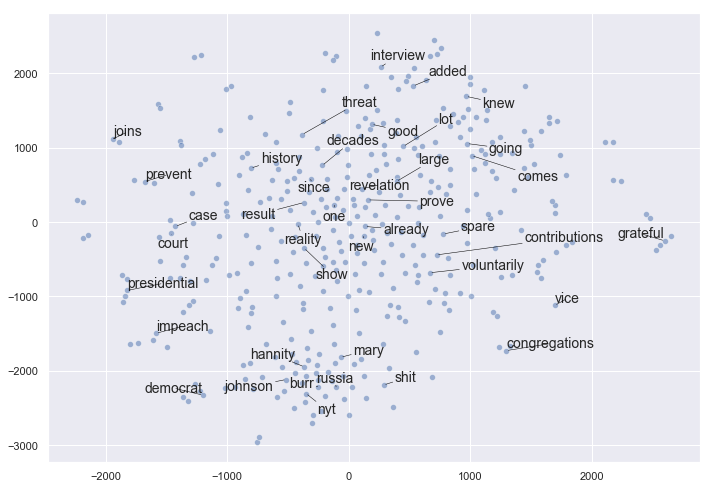

In [158]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))

    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

## Averaging Word2Vec (Word Embeddings)

Instead of using Doc2Vec, which does not have pre-trained models available and so would require a lengthy training process, we can use a simpler (and sometimes even more effective) trick: averaging the embeddings of the word vectors in each document. In our case, a document refers to a tweet.

In [166]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.vocab]
    return np.mean(model[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]
        
    corpus = [doc for doc in corpus if condition_on_doc(doc)]
    
    print("{} docs removed".format(number_of_docs - len(corpus)))
    
    return (corpus, texts)

        

Now we’ll use these to do the processing:

In [175]:
# Preprocess the corpus
corpus = [preprocess(title) for title in tweet_list]

# Remove docs that don't include any words in W2V's vocab
corpus, tweet_list = filter_docs(corpus, tweet_list, lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
corpus, tweet_list = filter_docs(corpus, tweet_list, lambda doc: (len(doc) != 0))

x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

0 docs removed
0 docs removed


Now that we’ve successfully created our array of document vectors, let’s see if we can get similarly interesting results when plotting them with t-SNE.

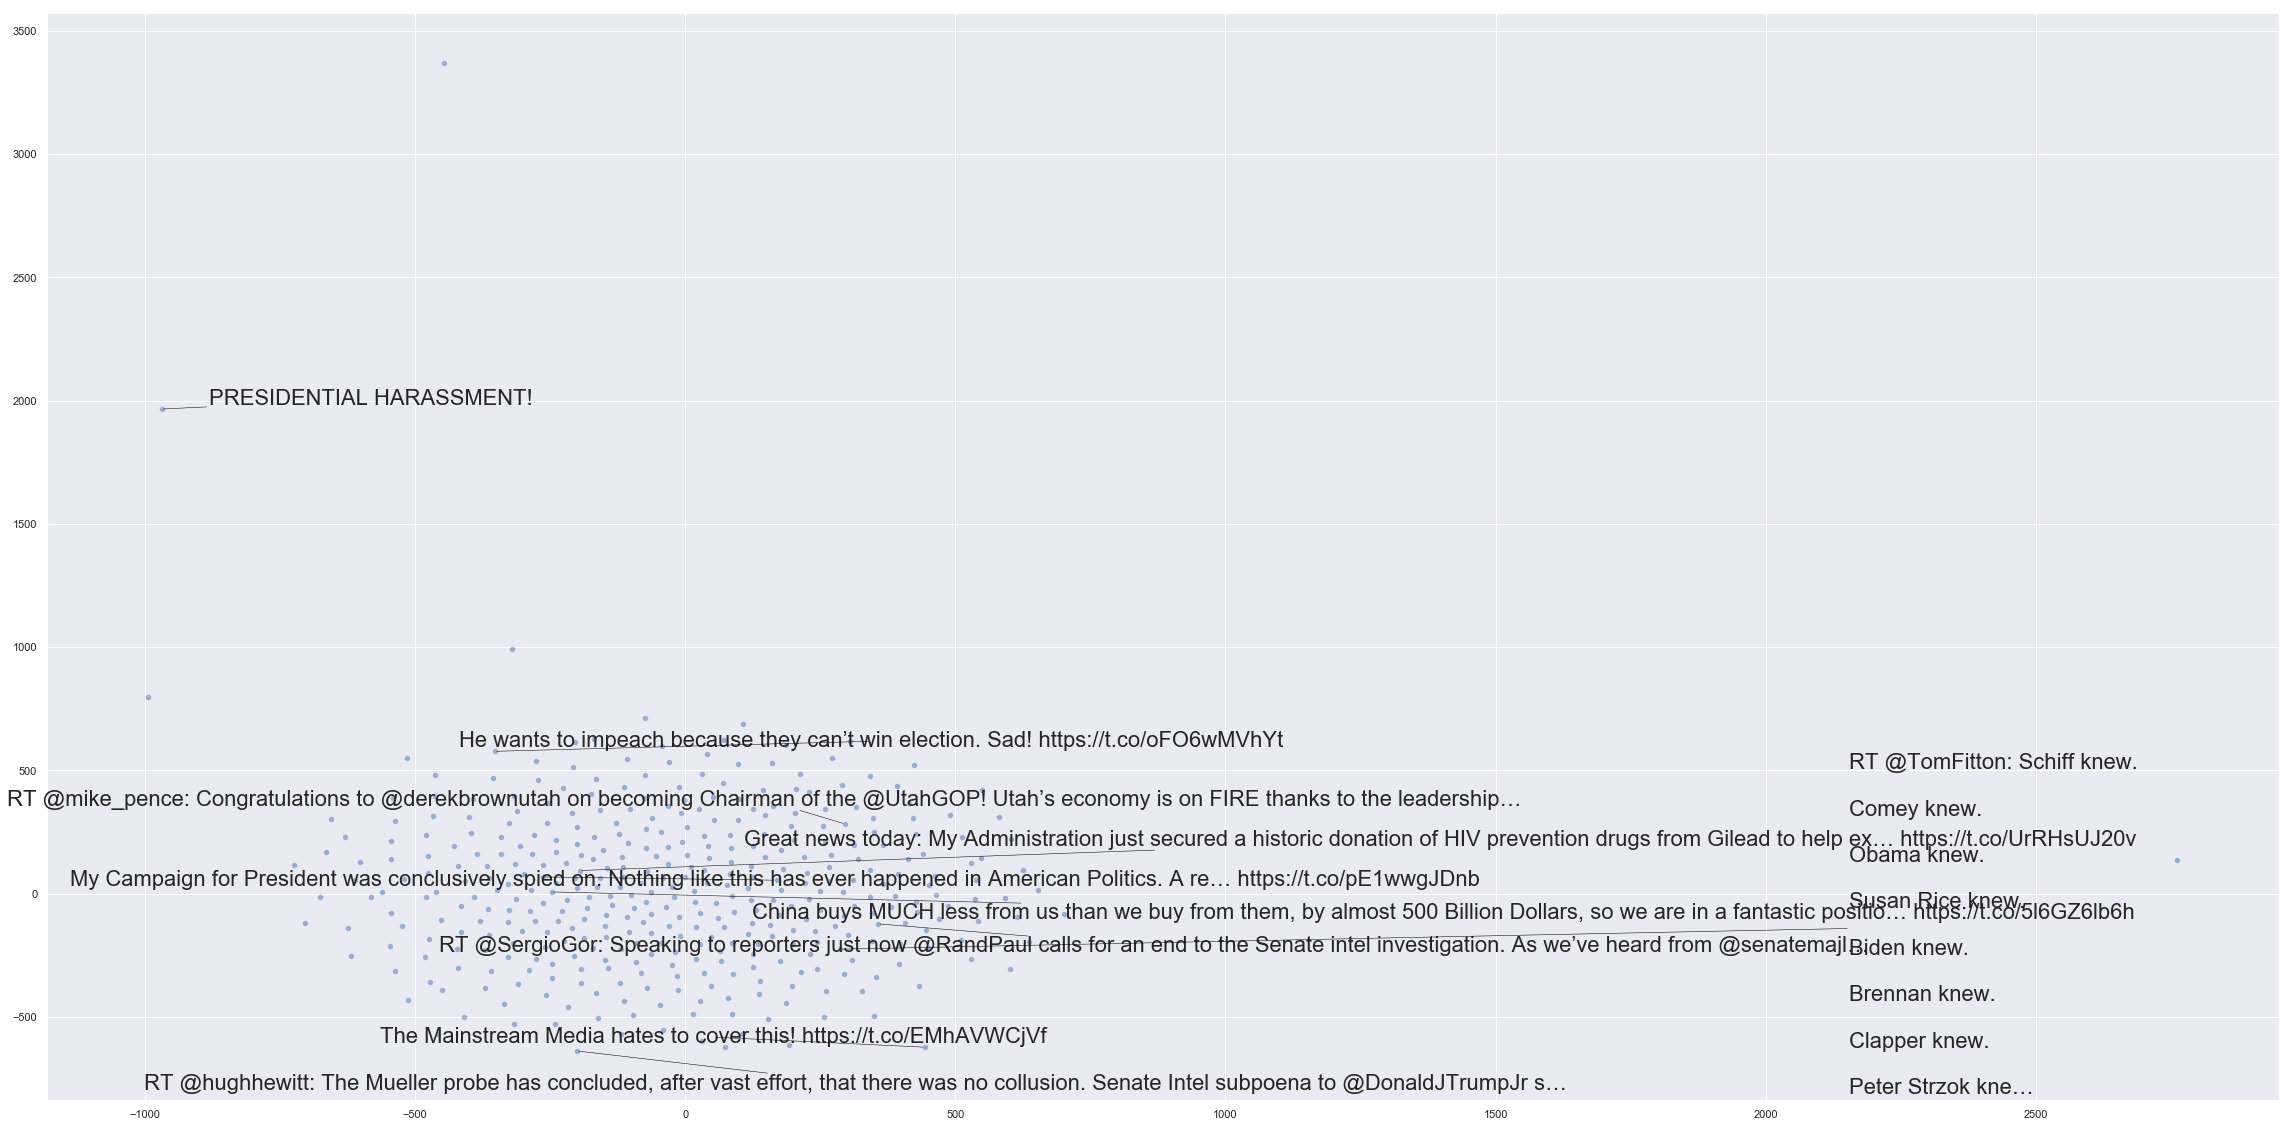

In [191]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100, n_iter=10000,learning_rate=5000)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:400])

fig, ax = plt.subplots(figsize = (40, 20))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 400, 40)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], tweet_list[title], fontsize = 22))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

Pretty interesting! We can see that the t-SNE has collapsed the document vectors into a dimensional space where the documents are spread out based on whether their content has more to do with countries, world leaders, and foreign affairs, or has more to do with technology companies.